Topics 

* assign: For adding new columns to a DataFrame in a chain 
* pipe: For including user-defined methods in method chains.
* rename: For altering axis names (in additional to changing the actual labels as before).
* Window methods: Took the top-level pd.rolling_* and pd.expanding_* functions 
* Resample: Added a new groupby-like API

Sources:
* [Modern Pandas (Part 2): Method Chaining](https://tomaugspurger.github.io/method-chaining) notebook by [Tom Augspurger](https://github.com/TomAugspurger).


Datasets
* Kaggle Dataset [WA_Fn-UseC_-HR-Employee-Attrition.csv](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

In [4]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# all datasets stored in dsnotes/inpute folder 

df = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470,NaN,NaN,NaN,36.9238,9.13537,18,30,36,43,60
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470,NaN,NaN,NaN,802.486,403.509,102,465,802,1157,1499
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470,NaN,NaN,NaN,9.19252,8.10686,1,2,7,14,29
Education,1470,NaN,NaN,NaN,2.91293,1.02416,1,2,3,4,5
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470,NaN,NaN,NaN,1,0,1,1,1,1,1
EmployeeNumber,1470,NaN,NaN,NaN,1024.87,602.024,1,491.25,1020.5,1555.75,2068


In [18]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [33]:
def read(fp):
    df = (pd.read_csv(fp)
            .drop('Over18', axis=1)
            .assign(Attrition=lambda x: pd.Categorical(x['Attrition']),
                    BusinessTravel=lambda x: pd.Categorical(x['BusinessTravel']),
                    Department=lambda x: pd.Categorical(x['Department']),
                    EducationField=lambda x: pd.Categorical(x['EducationField']),
                    Gender=lambda x: pd.Categorical(x['Gender']),
                    JobRole=lambda x: pd.Categorical(x['JobRole']),
                    MaritalStatus=lambda x: pd.Categorical(x['MaritalStatus']),
                    OverTime=lambda x: pd.Categorical(x['OverTime'])
                   ))
    return df

In [36]:
# del previous df and read it again using read() 
del df
 
df = read("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
StockOptionLevel               int64
T

### Apply chaining functions 

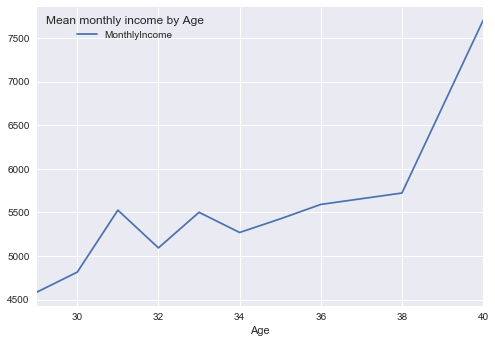

In [66]:

(df[['EmployeeNumber', 'Age', 'MonthlyIncome']]
   .dropna()
   .loc[df['Age']
       .isin(df['Age'].value_counts().index[:10])]
   .set_index('EmployeeNumber')
   .groupby(['Age'])
   .mean()
   .rename_axis("Mean monthly income by Age", axis=1)
   .plot()
)
sns.despine()

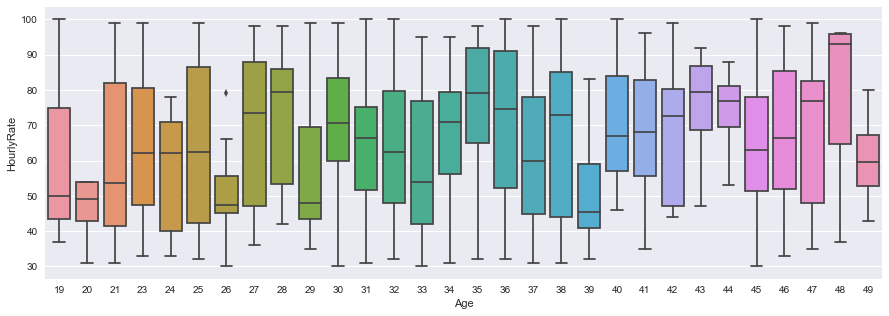

In [88]:
columns = ['EmployeeNumber', 'Department', 'Age', 'Gender', 'HourlyRate', 'MonthlyIncome', 'MaritalStatus',
                  'PerformanceRating', 'TrainingTimesLastYear', 'Attrition']

plt.figure(figsize=(15, 5))
(df[columns]
     .dropna()
     .pipe(lambda x: x[x['Department'] == 'Sales'])
     .query('18 < Age < 50')
     .pipe((sns.boxplot, 'data'), 'Age', 'HourlyRate'))

sns.despine()

In [89]:
def mode(x):
    '''
    Arbitrarily break ties.
    '''
    return x.value_counts().index[0]

In [90]:
mode(df['MonthlyIncome'])

2342

In [94]:
pd.plot.scatter(x=df['MonthlyIncome'], y = df['MonthlyIncome'].count(), bin=50)

AttributeError: module 'pandas' has no attribute 'plot'